In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import utils
import forward_model
import globals
import gradient_descent
import least_squares
import section_search
import coordinate_descent
import initialization

import torch

cuda


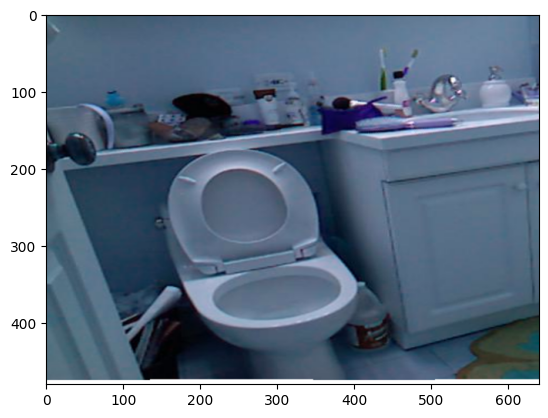

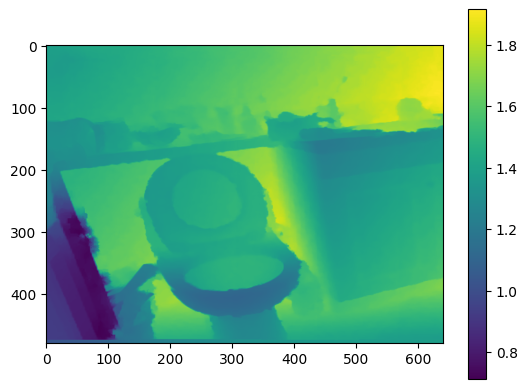

adaptive kernel size set to 23


In [7]:
globals.init_NYUv2()

# EXPERIMENT_NAME = 'coord-descent-bracket-search'
# experiment_folder = utils.create_experiment_folder(EXPERIMENT_NAME)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# load data 
# gt_aif, gt_dpt = utils.load_single_sample(sample='0045', set='train', fs=5, res='full')
gt_aif, gt_dpt, _ = utils.load_sample_image(fs=5, res='full')

plt.imshow(gt_aif)
plt.show()

plt.imshow(gt_dpt)
plt.colorbar()
plt.show()

width, height = gt_dpt.shape

max_kernel_size = utils.kernel_size_heuristic(width, height)
print('adaptive kernel size set to',max_kernel_size)
utils.update_max_kernel_size(max_kernel_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.002210316..1.0544693].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005449175..1.03685].


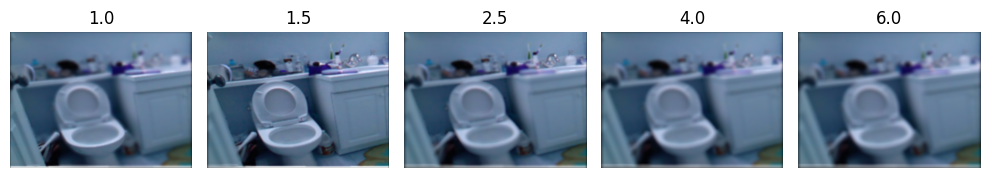

In [8]:
# forward model (torch)
FORWARD_KERNEL_TYPE = 'gaussian'
defocus_stack = forward_model.forward(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)
defocus_stack_torch = forward_model.forward_torch(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)#.float() / 255.0)
utils.plot_single_stack(defocus_stack_torch, globals.Df)



(480, 640, 5)


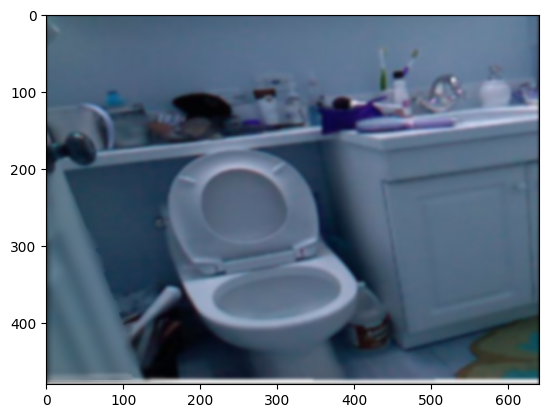

In [9]:
aif_init = initialization.compute_aif_initialization(defocus_stack, lmbda=0.05, sharpness_measure='laplacian')
# plt.imshow(defocus_stack[1]/255.)
# plt.show()

In [10]:
# -------------------
# COORDINATE DESCENT
# -------------------

# depth_init = 1#torch.median(gt_dpt.cpu()).item()
# print('initializing depth to',depth_init)

dpt, aif = coordinate_descent.coordinate_descent(width, height, defocus_stack, show_plots=False,
                                                 save_plots=True, num_epochs=20,
                                                 least_squares_first=False, aif_init=aif_init,
                                                 finite_differences=False, num_Z=25, use_CUDA=False)


Created experiment folder: experiments/coord-descent_2025-04-25_13-31-20
Iteration 0 



Grid search         : 100%|█████████████████████| 25/25 [19:10<00:00, 46.00s/it]


Loss: 15.569889306682317

Golden-section search...
...searching for 100 % convergence
...done
Loss: 12.460644113703761 , TV: 28271.635853323976

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1497.024923  48805.965738     100
  green   1533.336624  58951.259628     100
   blue   1568.829168  71177.654825     100

AIF result range: [ -229.5947941781803 , 473.2175206932649 ]
Loss: 1.5306925131317057 , TV: 11686635.857088514
Loss after clipping: 4.418441205719426 , TV: 10869865.699412452

Iteration 1 



Grid search         : 100%|█████████████████████| 25/25 [40:59<00:00, 98.40s/it]


Loss: 6.446121213202664

Golden-section search...
...searching for 100 % convergence
...done
Loss: 3.3818221954102086 , TV: 22158.987603005946

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    888.985223  48569.027163     100
  green    874.820788  58570.605285     100
   blue    872.684309  70695.455033     100

AIF result range: [ -249.96443805779808 , 440.95559406153166 ]
Loss: 0.5028612213845487 , TV: 8531572.2921152
Loss after clipping: 2.1645114628941724 , TV: 8165968.771429004

Iteration 2 



Grid search         : 100%|████████████████████| 25/25 [47:17<00:00, 113.48s/it]


Loss: 5.144928206973332

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.9904749669997897 , TV: 17696.00774443454

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    775.594955  48485.309298     100
  green    742.458914  58498.214994     100
   blue    723.696297  70614.718810     100

AIF result range: [ -324.13527933760207 , 425.15974226825887 ]
Loss: 0.36383017734570705 , TV: 7162138.403620461
Loss after clipping: 1.8391367764502398 , TV: 6808854.751722727

Iteration 3 



Grid search         : 100%|█████████████████████| 25/25 [35:39<00:00, 85.57s/it]


Loss: 4.858294071848939

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.73197134115229 , TV: 14178.641954891693

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    701.594983  48474.722870     100
  green    659.043024  58480.375308     100
   blue    643.404776  70595.345856     100

AIF result range: [ -234.44819690411998 , 476.3483035722668 ]
Loss: 0.29091649828779215 , TV: 6658762.849950874
Loss after clipping: 1.4622575669705156 , TV: 6334947.282219942

Iteration 4 



Grid search         : 100%|████████████████████| 25/25 [48:33<00:00, 116.53s/it]


Loss: 4.554474215439209

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.4387695000455891 , TV: 11919.684700595946

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    667.926563  48473.228888     100
  green    623.036419  58481.198756     100
   blue    607.603999  70595.822231     100

AIF result range: [ -230.32901830608816 , 482.98385807909125 ]
Loss: 0.2611725602952624 , TV: 6531654.536415161
Loss after clipping: 1.4497994809280041 , TV: 6207615.248411691

Iteration 5 



Grid search         : 100%|████████████████████| 25/25 [53:55<00:00, 129.40s/it]


Loss: 4.528147539484745

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.4205412138808198 , TV: 10377.45093066913

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    650.879463  48477.444816     100
  green    604.716441  58481.673480     100
   blue    589.167389  70594.954174     100

AIF result range: [ -175.30952335604712 , 506.8422598398047 ]
Loss: 0.24662424345963432 , TV: 6451123.835776595
Loss after clipping: 1.2710579739365229 , TV: 6141180.15501908

Iteration 6 



Grid search         : 100%|█████████████████████| 25/25 [28:27<00:00, 68.30s/it]


Loss: 4.346718376081273

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.2406015682823262 , TV: 9665.507405845969

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    638.339595  48475.426796     100
  green    592.208313  58479.622862     100
   blue    577.705909  70595.158132     100

AIF result range: [ -224.61205420558804 , 512.2941039617918 ]
Loss: 0.23696451417734357 , TV: 6400775.890028819
Loss after clipping: 1.259551990024975 , TV: 6084750.700775642

Iteration 7 



Grid search         : 100%|█████████████████████| 25/25 [28:57<00:00, 69.50s/it]


Loss: 4.339318685058567

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.2318695243869078 , TV: 9200.913117568023

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    634.931173  48462.222212     100
  green    588.229125  58472.333161     100
   blue    573.953523  70588.463547     100

AIF result range: [ -185.3546308106474 , 520.0733359695017 ]
Loss: 0.23406553452056622 , TV: 6308392.620102007
Loss after clipping: 1.0760955712224194 , TV: 6022496.08501276

Iteration 8 



Grid search         : 100%|█████████████████████| 25/25 [21:37<00:00, 51.89s/it]


Loss: 4.1687036903977575

Golden-section search...
...searching for 100 % convergence
...done
Loss: 1.0545548858589109 , TV: 8885.538706032843

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    628.829729  48460.304309     100
  green    582.456335  58473.186816     100
   blue    568.076740  70589.614063     100

AIF result range: [ -208.49687826119762 , 524.1618601185629 ]
Loss: 0.22946910308099996 , TV: 6313890.503661885
Loss after clipping: 1.0126920675708904 , TV: 6011309.599053055

Iteration 9 



Grid search         : 100%|█████████████████████| 25/25 [21:15<00:00, 51.02s/it]


Loss: 4.088613002674435

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.982797814203412 , TV: 8662.711970326054

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    611.567426  48453.712058     100
  green    565.734556  58459.339338     100
   blue    551.510660  70577.707653     100

AIF result range: [ -199.52418784056104 , 482.57748240385746 ]
Loss: 0.2166307581443229 , TV: 6216744.393625233
Loss after clipping: 0.8868412925906419 , TV: 5951135.780464353

Iteration 10 



Grid search         : 100%|█████████████████████| 25/25 [19:45<00:00, 47.43s/it]


Loss: 3.971009896053826

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.8659663140776097 , TV: 8713.13055326288

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    599.753485  48457.572169     100
  green    554.114438  58459.675196     100
   blue    539.545042  70575.878191     100

AIF result range: [ -187.61283244189886 , 489.3861208553641 ]
Loss: 0.20786808058117182 , TV: 6198104.157822582
Loss after clipping: 0.8675809563051678 , TV: 5929874.936084637

Iteration 11 



Grid search         : 100%|█████████████████████| 25/25 [14:15<00:00, 34.24s/it]


Loss: 3.9587543482430525

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.8572353696477468 , TV: 8847.99142597957

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    595.758031  48465.277683     100
  green    550.238747  58463.051730     100
   blue    536.715898  70576.180128     100

AIF result range: [ -185.77412803704536 , 477.64911503155474 ]
Loss: 0.2052418564963056 , TV: 6182353.44540772
Loss after clipping: 0.892375008224284 , TV: 5912128.951755145

Iteration 12 



Grid search         : 100%|█████████████████████| 25/25 [14:12<00:00, 34.10s/it]


Loss: 3.976760834958663

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.8735575461633582 , TV: 8758.839658698644

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    598.942828  48465.484296     100
  green    552.874721  58464.218035     100
   blue    539.251321  70577.897136     100

AIF result range: [ -194.86231272161055 , 466.74638533495073 ]
Loss: 0.20729061800706153 , TV: 6175352.1608549515
Loss after clipping: 0.8905805204585459 , TV: 5906660.712409883

Iteration 13 



Grid search         : 100%|█████████████████████| 25/25 [14:04<00:00, 33.80s/it]


Loss: 3.977592547410637

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.873315157932235 , TV: 8578.100888392924

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    598.048697  48471.253431     100
  green    552.311704  58469.268136     100
   blue    538.685937  70581.754994     100

AIF result range: [ -179.18078117492675 , 456.3047781933011 ]
Loss: 0.20679106156627328 , TV: 6164143.899078517
Loss after clipping: 0.8952289916587126 , TV: 5891529.488449149

Iteration 14 



Grid search         : 100%|█████████████████████| 25/25 [14:10<00:00, 34.01s/it]


Loss: 3.994139499550852

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.8819090777465537 , TV: 8778.438219667001

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    598.951498  48462.269907     100
  green    553.332598  58463.812122     100
   blue    540.784688  70577.482666     100

AIF result range: [ -179.48723314582787 , 445.11957533512043 ]
Loss: 0.20776218553218714 , TV: 6137544.111956133
Loss after clipping: 0.8440889749040672 , TV: 5869931.003474937

Iteration 15 



Grid search         : 100%|█████████████████████| 25/25 [14:16<00:00, 34.25s/it]


Loss: 3.9384995006129597

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.8277663713302961 , TV: 8848.045655216743

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    594.809498  48453.664810     100
  green    549.063338  58459.471396     100
   blue    535.685434  70575.813656     100

AIF result range: [ -177.85877893372154 , 438.9319094537481 ]
Loss: 0.20447655826999903 , TV: 6107242.22761152
Loss after clipping: 0.813363115939421 , TV: 5845708.462447008

Iteration 16 



Grid search         : 100%|█████████████████████| 25/25 [14:11<00:00, 34.06s/it]


Loss: 3.9066320543312014

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.7989830010958537 , TV: 9004.727684748821

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    587.203788  48441.168977     100
  green    542.728851  58451.406925     100
   blue    529.563826  70570.482178     100

AIF result range: [ -159.13874423588535 , 435.06829371192777 ]
Loss: 0.19960957984644853 , TV: 6076294.5723886695
Loss after clipping: 0.7787395056308936 , TV: 5826933.9156671865

Iteration 17 



Grid search         : 100%|█████████████████████| 25/25 [14:13<00:00, 34.15s/it]


Loss: 3.878007988724794

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.768667929592373 , TV: 8892.853323966858

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    586.316116  48437.541304     100
  green    541.210435  58447.589448     100
   blue    529.088888  70565.856599     100

AIF result range: [ -156.00745190772224 , 435.36110457082253 ]
Loss: 0.1989172256450748 , TV: 6047784.006461514
Loss after clipping: 0.7306251165699145 , TV: 5805100.760700618

Iteration 18 



Grid search         : 100%|█████████████████████| 25/25 [14:08<00:00, 33.93s/it]


Loss: 3.8283883327376445

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.7192256897247071 , TV: 8719.201016455007

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    583.918280  48439.540599     100
  green    538.258008  58449.214986     100
   blue    524.426229  70566.555421     100

AIF result range: [ -160.82111834614926 , 435.1503861707545 ]
Loss: 0.19655063188561328 , TV: 6024864.747309528
Loss after clipping: 0.7029766652846459 , TV: 5786055.586670593

Iteration 19 



Grid search         : 100%|█████████████████████| 25/25 [14:15<00:00, 34.21s/it]


Loss: 3.7982490483120954

Golden-section search...
...searching for 100 % convergence
...done
Loss: 0.6918214103487627 , TV: 8631.562955259311

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red    583.844006  48444.797458     100
  green    537.619403  58450.014743     100
   blue    522.200220  70565.190786     100

AIF result range: [ -177.62194181884266 , 437.2859581536084 ]
Loss: 0.1958771087488187 , TV: 6004247.035891396
Loss after clipping: 0.6742706106080776 , TV: 5773025.689841455



In [ ]:
utils.plot_compare_rgb(aif.cpu(), gt_aif)
plt.show()

In [ ]:
utils.plot_compare_greyscale(dpt.cpu(), gt_dpt, vmin=0.7, vmax=1.9)
plt.show()

In [ ]:
# worst_coords = utils.get_worst_diff_pixels(dpt.cpu(), gt_dpt,
#     num_worst_pixels = 20)

# _, Z, _, all_losses = section_search.grid_search(aif.cpu(), defocus_stack_torch.cpu())

indices = forward_model.precompute_indices(width, height)
defocus_stacks = torch.zeros((len(Z), 5, width, height, 3))
for k in range(len(Z)):
    defocus_stack_k = forward_model.forward_torch(torch.full((width,height), Z[k]).to(aif.device),
                                                  aif, indices=indices)

    defocus_stacks[k] = defocus_stack_k

for i, j in worst_coords[:5]:
    section_search.plot_grid_search_on_pixel(i.item(), j.item(), Z, all_losses, gt_dpt)
    
    i_min = max(0, i.item()-max_kernel_size//2)
    i_max = min(width, i.item()+max_kernel_size//2+1)
    j_min = max(0, j.item()-max_kernel_size//2)
    j_max = min(height, j.item()+max_kernel_size//2+1)
    plt.imshow(aif.cpu()[i_min:i_max, j_min:j_max] / 255.)
    plt.title("Local AIF region for ("+str(i.item())+", "+str(j.item())+")")
    plt.show()
    print('Red range:',aif.cpu()[i_min:i_max, j_min:j_max, 0].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 0].max().item())
    print('Green range:',aif.cpu()[i_min:i_max, j_min:j_max, 1].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 1].max().item())
    print('Blue range:',aif.cpu()[i_min:i_max, j_min:j_max, 2].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 2].max().item())
    print('TV of AIF region:',section_search.total_variation_torch(aif[i_min:i_max, j_min:j_max]).item())
    # plt.imshow(gt_aif.cpu()[i_min:i_max, j_min:j_max] / 255.)
    # plt.title("GT local region for ("+str(i.item())+", "+str(j.item())+")")
    # plt.show()
    
    plt.imshow(dpt.cpu()[i_min:i_max, j_min:j_max], vmin=0.9, vmax=1.7)
    plt.title("Local DPT region for ("+str(i.item())+", "+str(j.item())+")")
    plt.show()
    print('TV of depth map region:',section_search.total_variation_torch(dpt[i_min:i_max, j_min:j_max]).item())

    
    # plt.imshow(defocus_stacks[:,:,i.item(),j.item(),:] / 255.)
    # plt.show()

    
    mse = torch.mean((defocus_stacks[:,:,i.item(),j.item(),:] - defocus_stack_torch[:,i.item(),j.item(),:]) ** 2, axis=2)
    # plt.imshow(mse)
    # plt.colorbar()
    # plt.show()

    fig, ax = plt.subplots(figsize=(10, 20))
    cax = ax.imshow(mse, cmap="viridis", aspect="auto", interpolation="nearest")
    
    cbar = plt.colorbar(cax, ax=ax, shrink=0.3)
    cbar.set_label("Color Scale")
    
    ax.set_yticks(np.arange(len(Z)))
    ax.set_yticklabels([np.round(z,2) for z in Z], fontsize=8)
    ax.set_ylabel('Z (Depth)', fontsize=10)
    
    ax.set_xticks(np.arange(len(globals.Df)))
    ax.set_xticklabels([df.item() for df in globals.Df], fontsize=8)
    ax.set_xlabel('d_f (Focus Setting in Focal Stack)', fontsize=10)
    
    ax.grid(which="minor", color="white", linestyle="-", linewidth=1)
    ax.set_xticks(np.arange(-0.5, 5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 100, 1), minor=True)
    
    plt.show()



In [ ]:
plt.imshow((dpt.cpu()-gt_dpt.cpu())**2)
plt.colorbar()
plt.title('(DPT - GT DPT)^2')
plt.show()

In [ ]:
tol=0.1
for df in globals.Df:
    mask = np.abs(gt_dpt.detach().cpu().numpy() - df.item()) <= tol
    y_coords, x_coords = np.where(mask)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(gt_dpt.cpu(), vmin=0.9, vmax=1.7)
    plt.scatter(x_coords, y_coords, color='red', marker='x', s=10, label=f'Within ±{tol} of {df}m')
    plt.legend()
    plt.title('Points Close to '+str(df.item())+' m')
    plt.axis('off')
    plt.show()

In [ ]:
pad = max_kernel_size // 2
width, height, _ = aif.shape

gt_aif_tv_map = np.zeros((width, height))
aif_tv_map = np.zeros((width, height))
gt_tv_map = np.zeros((width, height))
tv_map = np.zeros((width, height))

for i in range(pad, width - pad):
    for j in range(pad, height - pad):
        gt_window = gt_aif.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        gt_aif_tv_map[i, j] = coordinate_descent.total_variation_torch(gt_window).item()
        window = aif.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        aif_tv_map[i, j] = coordinate_descent.total_variation_torch(window).item()
        
        gt_window = gt_dpt.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        gt_tv_map[i, j] = coordinate_descent.total_variation_torch(gt_window).item()
        window = dpt.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        tv_map[i, j] = coordinate_descent.total_variation_torch(window).item()

vmin = min(aif_tv_map.min(), gt_aif_tv_map.min())
vmax = max(aif_tv_map.max(), gt_aif_tv_map.max())
utils.plot_compare_greyscale((aif_tv_map - vmin) / (vmax-vmin), (gt_aif_tv_map - vmin) / (vmax-vmin))
# plt.title('TV of AIF')
plt.show()

vmin = min(tv_map.min(), gt_tv_map.min())
vmax = max(tv_map.max(), gt_tv_map.max())
utils.plot_compare_greyscale((tv_map - vmin) / (vmax-vmin), (gt_tv_map - vmin) / (vmax-vmin))
# plt.title('TV of depth maps')
plt.show()

In [ ]:
print(dpt.cpu()[i.item(),j.item()])
print(gt_dpt.cpu()[i.item(),j.item()])

In [ ]:
u, v, row, col, mask = indices

r = forward_model.computer(gt_dpt, globals.Df)
print(r.shape)
_, _, fs = r.shape
r = r.unsqueeze(-1).unsqueeze(-1)
    
G, _ = forward_model.computeG(r, u, v)
print(G.shape)

In [ ]:
print(r[i.item(),j.item()])

In [ ]:
num_plots = len(globals.Df)
fig, axes = plt.subplots(1, num_plots, figsize=(20, 5), constrained_layout=True)

vmin = 0#torch.min(G[222, 178, :, :, :]).item()
vmax = 0.05#torch.max(G[222, 178, :, :, :]).item()

# Plot each subplot with a shared color scale
for k in range(num_plots):
    im = axes[k].imshow(G[i.item(), j.item(), k, :, :].cpu(), vmin=vmin, vmax=vmax)  # Ensure it's on CPU for plotting
    axes[k].set_title(globals.Df[k].item())
    print(G[i.item(), j.item(), k, :, :].sum())

# Create a global colorbar
cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Color Scale")

# Show the figure
plt.title('Blur Kernels')
plt.show()

In [ ]:
utils.plot_single_stack(defocus_stack_torch[:,i_min:i_max,j_min:j_max,:], globals.Df, recon_max=255.)


In [ ]:
utils.plot_single_stack(forward_model.forward_torch(dpt.cpu(), aif.cpu())[:,i_min:i_max,j_min:j_max,:], globals.Df, recon_max=255.)


In [ ]:
print(u.shape, v.shape, r.shape, G.shape)

In [ ]:
print(defocus_stack_torch[i.item(),j.item()])

In [ ]:
forward_model.forward_torch(dpt.cpu(), aif.cpu())[:,i_min:i_max,j_min:j_max,:]